### Local Cafe Sales Analysis and Prediction
#### By Thant Thaw Tun (Thomas)

A short analysis on coffee sales on a local cafe, using the dataset from Kaggle


In [2]:
#pip install kagglehub[pandas-datasets]

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "coffe.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "jawad3664/coffee-shop",
    file_path
)


c:\Users\Thant Thaw Tun\anaconda3\envs\ML\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Thant Thaw Tun\AppData\Local\Temp\ipykernel_31956\1755695990.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


In [4]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,01/03/2024,15:50.5
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,01/03/2024,19:22.5
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,01/03/2024,20:18.1
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,01/03/2024,46:33.0
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,01/03/2024,48:14.6


In [5]:
df['Date'].max()

'31/12/2024'

In [6]:
sales = df.set_index("Date", inplace=False)

In [17]:
print("Dataset Overview:", sales.dtypes, "\nShape and Size:", sales.shape, sales.size, sep="\n")

Dataset Overview:
hour_of_day      int64
cash_type       object
money          float64
coffee_name     object
Time_of_Day     object
Weekday         object
Month_name      object
Weekdaysort      int64
Monthsort        int64
Time            object
dtype: object

Shape and Size:
(3547, 10)
35470


In [8]:
sales.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Time
Date,,,,,,,,,,
01/03/2024,10,card,38.7,Latte,Morning,Fri,Mar,5,3,15:50.5
01/03/2024,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,19:22.5
01/03/2024,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,20:18.1
01/03/2024,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,46:33.0
01/03/2024,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,48:14.6


#### Why analyze coffee shop sales? 
To optimize staffing, inventory, and promotions as well as analyse trends in coffee type sales overtime.

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

C:\Users\Thant Thaw Tun\AppData\Local\Temp\ipykernel_31956\3673594533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coffee_sales, x="coffee_name", y="money", palette="viridis")


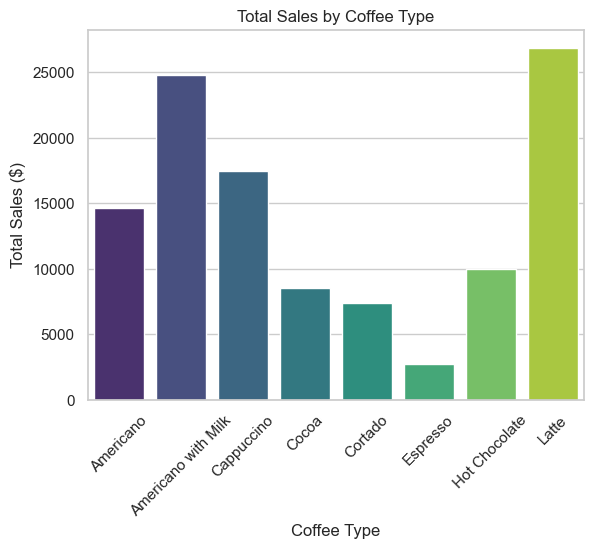

In [10]:
coffee_sales = sales.groupby("coffee_name")["money"].sum().reset_index()
sns.barplot(data=coffee_sales, x="coffee_name", y="money", palette="viridis")

plt.title("Total Sales by Coffee Type")
plt.xticks(rotation=45)
plt.xlabel("Coffee Type")
plt.ylabel("Total Sales ($)")
plt.show()

In [11]:
sales['cash_type'].value_counts()

cash_type
card    3547
Name: count, dtype: int64

C:\Users\Thant Thaw Tun\AppData\Local\Temp\ipykernel_31956\1328363211.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=preferred_time, x="Time_of_Day", y="money", order=order, palette="magma")


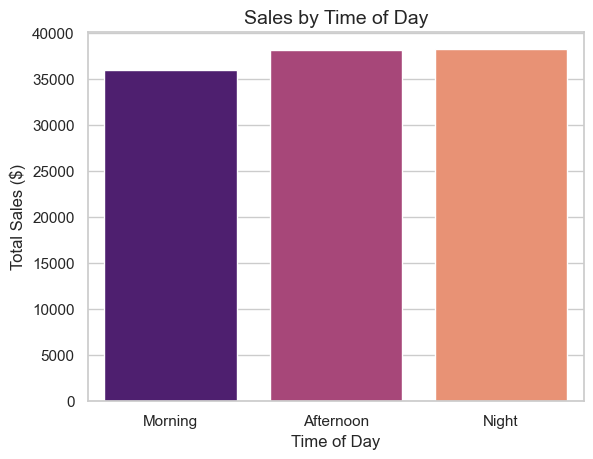

In [12]:
preferred_time = sales.groupby("Time_of_Day")["money"].sum().reset_index()
order = ["Morning", "Afternoon", "Night"]
sns.barplot(data=preferred_time, x="Time_of_Day", y="money", order=order, palette="magma")

plt.title("Sales by Time of Day", fontsize=14)
plt.xlabel("Time of Day")
plt.ylabel("Total Sales ($)")
plt.show()


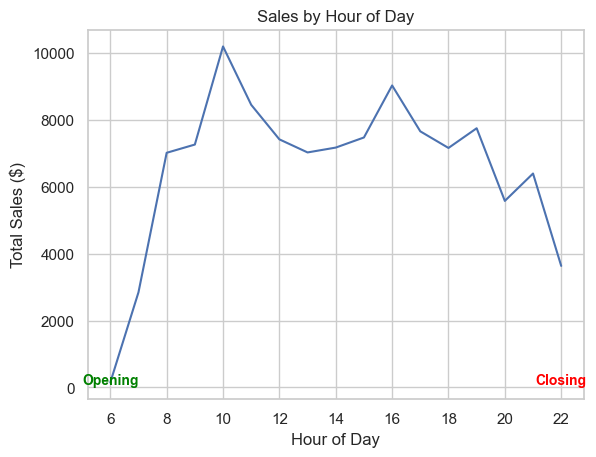

In [13]:
busy_hours = sales.groupby(sales['hour_of_day'])["money"].sum()
sns.lineplot(data=busy_hours, markers='o')

plt.xlabel("Hour of Day")
plt.ylabel("Total Sales ($)")
plt.title("Sales by Hour of Day")
plt.text(6, 0, "Opening", ha="center", va="bottom", fontsize=10, color="green", fontweight="bold")
plt.text(22, 0, "Closing", ha="center", va="bottom", fontsize=10, color="red", fontweight="bold")
plt.show()

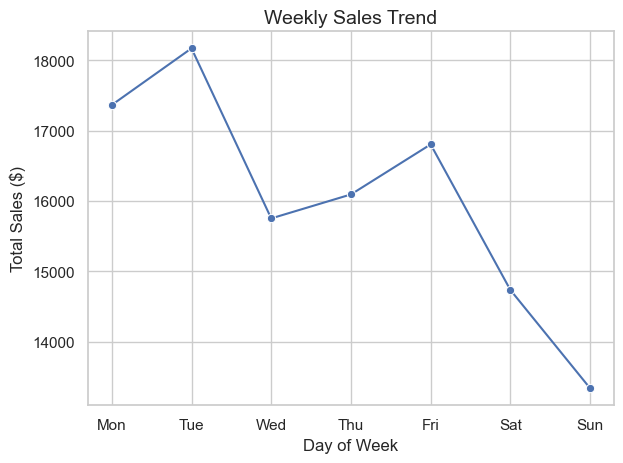

In [20]:
clean = sales.dropna(subset=["Weekday", "money"])

weekly_trend = (
    clean.groupby(["Weekday", "Weekdaysort"], as_index=False)["money"].sum()
    .sort_values("Weekdaysort")
)

sns.lineplot(data=weekly_trend, x="Weekday", y="money", marker="o", sort=False)
plt.title("Weekly Sales Trend", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Total Sales ($)")
plt.tight_layout()
plt.show()


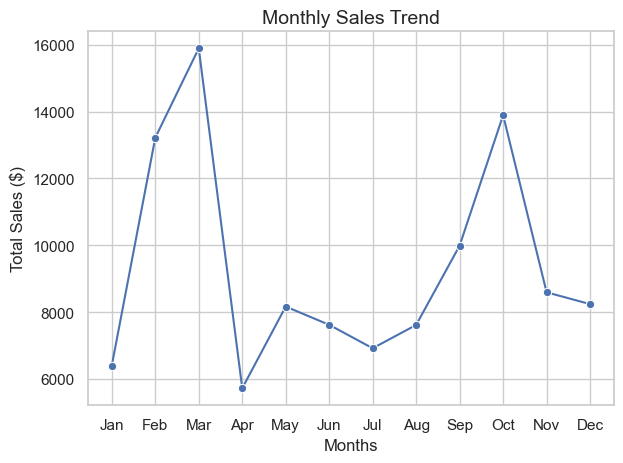

In [21]:
clean2 = sales.dropna(subset=["Month_name", "money"])

weekly_trend = (
    clean.groupby(["Month_name", "Monthsort"], as_index=False)["money"].sum()
    .sort_values("Monthsort")
)

sns.lineplot(data=weekly_trend, x="Month_name", y="money", marker="o", sort=False)
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Months")
plt.ylabel("Total Sales ($)")
plt.tight_layout()
plt.show()

#### Key Business Insights

Top Products: Latte and Americano with Milk dominate revenue → focus marketing/ promotions on them.

Busiest Hours: Peak sales between 9–11 AM and 3–5 PM → staffing recommendations.

Weekly Trend: Tuesday and Friday being the busiest days while Sunday having a low customer income → generate customer with promotions on lower days.

Seasonality: Higher sales in January, October, and Feburary → inventory planning.

#### Predictions

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = sales[["hour_of_day", "coffee_name", "cash_type", "Time_of_Day", "Weekday", "Month_name"]]
y = sales["money"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical = ["coffee_name", "cash_type", "Time_of_Day", "Weekday", "Month_name"]
numeric = ["hour_of_day"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", "passthrough", numeric)
    ]
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
print("RMSE:", rmse)


RMSE: 0.500780910795264


R²: 0.9781095591341367


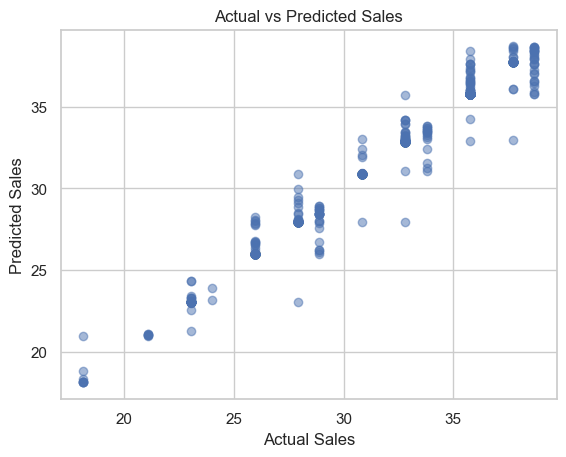

In [23]:
from sklearn.metrics import r2_score
print("R²:", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [24]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print("Cross-validated R²:", np.mean(scores))


Cross-validated R²: 0.8512828516219981


C:\Users\Thant Thaw Tun\AppData\Local\Temp\ipykernel_31956\3381908966.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp.head(15), x="Importance", y="Feature", palette="viridis")


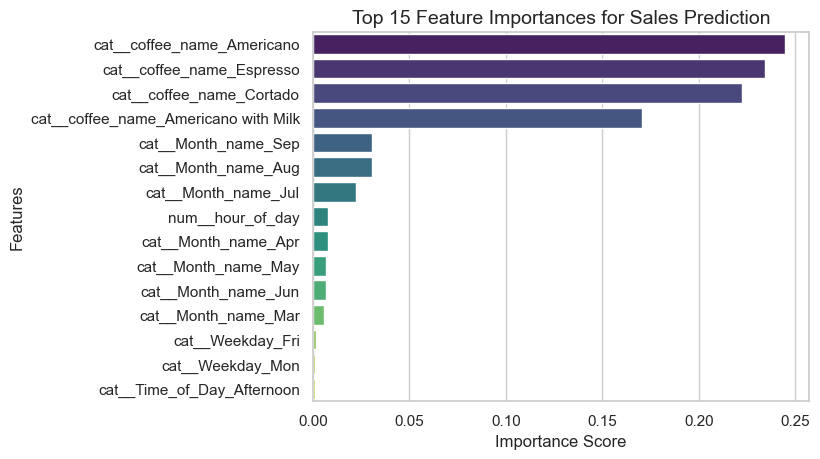

In [26]:
feature_names = model.named_steps["preprocessor"].get_feature_names_out()
importances = model.named_steps["regressor"].feature_importances_

feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

sns.barplot(data=feat_imp.head(15), x="Importance", y="Feature", palette="viridis")
plt.title("Top 15 Feature Importances for Sales Prediction", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


#### Insights

`Goal`: Predict transaction revenue (money) from time, and product.

`Model Used`: Random Forest Regressor with preprocessing pipeline.


`Performance`:

RMSE ≈ 0.5 (low error).

R² ≈ 0.98 on test split, ≈ 0.85 cross‑validated → strong generalization.

`Feature Importance`:

Time of day and coffee type are the strongest predictors.

Weekday and month also contribute.

#### Business Recommendations
Staffing: Increase staff during peak hours (morning & evening).

Menu Strategy: Promote high‑margin coffee types; consider phasing out low performers.

Promotions: Offer discounts during off‑peak hours to balance demand.

Payment Systems: Ensure smooth card transactions if most revenue comes from card users.

Forecasting: Use predictive models to anticipate daily/weekly revenue for better planning.